The MNIST dataset consists of images of digits from a variety of scanned documents. Each image is a 28X28 pixel square. In this dataset 60,000 images are used to train the model and 10,000 images are used to test the model. There are 10 digits (0 to 9) or 10 classes to predict.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.image as mimg

###Loading the MINIST Dataset

In [ ]:
seed = 10
np.random.seed(seed)
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X train data shape",X_train.shape)
print("X test data shape",X_test.shape)
print("Y train shape",y_train.shape)
print("Y test shape",y_test.shape)

X train data shape (60000, 28, 28)
X test data shape (10000, 28, 28)
Y train shape (60000,)
Y test shape (10000,)


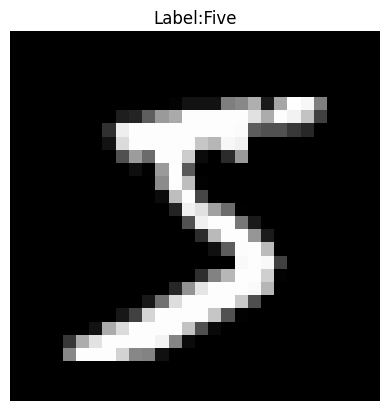

In [ ]:
#plotting the image
y_labels = {0:'Zero',1:'One',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}
plt.imshow(X_train[0],cmap='gray')
plt.title(f'Label:{y_labels[y_train[0]]}')
plt.axis('off')
plt.show()

In [ ]:
#finding out the unique records of y_train
unique_labels = np.unique(y_train)
print(f'The Unique Labels of y_train: {unique_labels}')

The Unique Labels of y_train: [0 1 2 3 4 5 6 7 8 9]


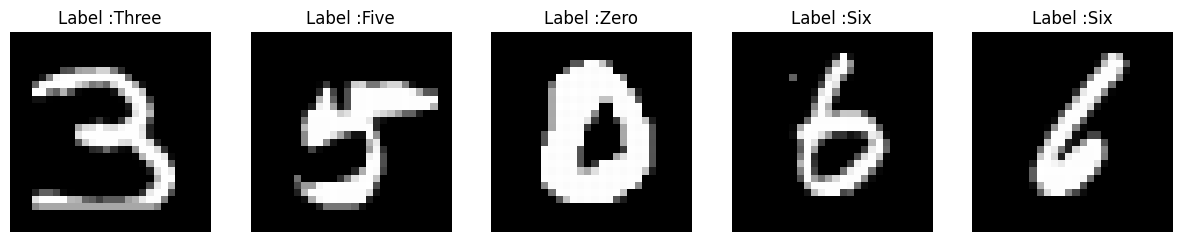

In [ ]:
#plotting the 5 images
xtrain = X_train[:] #Five sample images
ytrain = y_train[:]#Five sample labels

y_labels = {0:'Zero',1:'One',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}
#selecting the 5 images to plot
number_of_images_to_display = 5
selected_indices = np.random.choice(len(xtrain),number_of_images_to_display,replace=False)

#plot the selected figures
plt.figure(figsize=(15,8))
for i,idx in enumerate(selected_indices):
  plt.subplot(1,number_of_images_to_display,i+1)
  plt.imshow(xtrain[idx],cmap='gray')
  plt.title(f'Label :{y_labels[ytrain[idx]]}')
  plt.axis('off')
plt.show()

###DL Model with Multi Layer Perceptron using MINIST


#### Reshaping the data


In [ ]:
#Reshaping the train and test data
X_train_reshaped = X_train.reshape(X_train.shape[0],-1)
X_test_reshaped = X_test.reshape(X_test.shape[0],-1)
print("Before Reshaping Xtrain shape",X_train.shape,"After Reshaping Xtrain shape",X_train_reshaped.shape)
print("Before Reshaping Xtest shape",X_test.shape,"After Resshaping Xtest shape",X_test_reshaped.shape)

Before Reshaping Xtrain shape (60000, 28, 28) After Reshaping Xtrain shape (60000, 784)
Before Reshaping Xtest shape (10000, 28, 28) After Resshaping Xtest shape (10000, 784)


In [ ]:
#X_train_reshaped[0]
X_train.ndim,X_train_reshaped.ndim

(3, 2)

### Normalizing the dataset

In [ ]:
X_train_reshaped = X_train_reshaped/255.0
X_test_reshaped = X_test_reshaped/255.0

In [ ]:
X_train_reshaped[0][0]

0.0

#### One hot encoding for target varibale

In [ ]:
##one hot encoding
no_of_classes = 10
y_train_one_hot = tf.one_hot(y_train,depth=no_of_classes)
y_test_one_hot = tf.one_hot(y_test,depth=no_of_classes)

In [ ]:
print("Before One hot encoding",y_train.shape,"After one hot encoding",y_train_one_hot.shape)
print("Before One hot encoding",y_test.shape,"After one hot encoding",y_test_one_hot.shape)

Before One hot encoding (60000,) After one hot encoding (60000, 10)
Before One hot encoding (10000,) After one hot encoding (10000, 10)


### Define Model Function

In [ ]:
def nn_model(number_pixes,num_classes):
  model = Sequential()
  model.add(Dense(number_pixes,input_dim = number_pixes,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))

  model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
  return model

#### Run the model



In [ ]:
number_pixes,num_classes =( X_train.shape[1] *X_train.shape[2]),10
model = nn_model(number_pixes,num_classes)
model.fit(X_train_reshaped,y_train_one_hot,validation_data=(X_test_reshaped,y_test_one_hot),epochs=10,batch_size=300,verbose=2)
score = model.evaluate(X_test_reshaped,y_test_one_hot,verbose=0)
print('The error is:%.2f%%'%(100-score[1]*100))

Epoch 1/10
200/200 - 10s - loss: 0.3159 - accuracy: 0.9116 - val_loss: 0.1667 - val_accuracy: 0.9497 - 10s/epoch - 51ms/step
Epoch 2/10
200/200 - 1s - loss: 0.1290 - accuracy: 0.9632 - val_loss: 0.1069 - val_accuracy: 0.9668 - 1s/epoch - 5ms/step
Epoch 3/10
200/200 - 1s - loss: 0.0859 - accuracy: 0.9753 - val_loss: 0.0884 - val_accuracy: 0.9729 - 1s/epoch - 5ms/step
Epoch 4/10
200/200 - 1s - loss: 0.0621 - accuracy: 0.9828 - val_loss: 0.0727 - val_accuracy: 0.9767 - 1s/epoch - 7ms/step
Epoch 5/10
200/200 - 1s - loss: 0.0460 - accuracy: 0.9869 - val_loss: 0.0667 - val_accuracy: 0.9789 - 1s/epoch - 7ms/step
Epoch 6/10
200/200 - 1s - loss: 0.0353 - accuracy: 0.9905 - val_loss: 0.0635 - val_accuracy: 0.9799 - 1s/epoch - 7ms/step
Epoch 7/10
200/200 - 2s - loss: 0.0280 - accuracy: 0.9923 - val_loss: 0.0626 - val_accuracy: 0.9807 - 2s/epoch - 8ms/step
Epoch 8/10
200/200 - 2s - loss: 0.0213 - accuracy: 0.9948 - val_loss: 0.0637 - val_accuracy: 0.9799 - 2s/epoch - 10ms/step
Epoch 9/10
200/200 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Building CNN model

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

#### Reshaping the data

In [ ]:
x_train_reshape = X_train.reshape(X_train.shape[0],1,28,28)
x_test_reshape = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
print(f'Before Reshaping Xtrain {X_train.shape} After reshaping Xtrain {x_train_reshape.shape}')
print(f'Before Reshaping Xtest {X_test.shape} After reshaping Xtest {x_test_reshape.shape}')

Before Reshaping Xtrain (60000, 28, 28) After reshaping Xtrain (60000, 1, 28, 28)
Before Reshaping Xtest (10000, 28, 28) After reshaping Xtest (10000, 1, 28, 28)


In [ ]:
print(f'Before Reshaping Dimen {X_train.ndim} After Reshaping Dimen {x_train_reshape.ndim}')
print(f'Before Reshaping Dimen {X_test.ndim} After Reshaping Dimen {x_test_reshape.ndim}')

Before Reshaping Dimen 3 After Reshaping Dimen 4
Before Reshaping Dimen 3 After Reshaping Dimen 4


#### Normalize the input data  and One hot encoding for target variables



In [ ]:
no_of_classes = 10
x_train_scaled = x_train_reshape/255.0
x_test_scaled = x_test_reshape/255.0
y_train_scaled = tf.one_hot(y_train,depth=no_of_classes)
y_test_scaled = tf.one_hot(y_test,depth=no_of_classes)

In [ ]:
print(f"before one hot encoding {y_train.shape} after one hot encoding {y_train_scaled.shape}")
print(f"before one hot encoding {y_test.shape} after one hot encoding {y_test_scaled.shape}")

before one hot encoding (60000,) after one hot encoding (60000, 10)
before one hot encoding (10000,) after one hot encoding (10000, 10)


#### Model

In [ ]:
def cnn_model():
  model = Sequential()
  model.add(Conv2D(32,5,5,padding='same',input_shape=(1,28,28),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
c_model = cnn_model()
c_model.fit(x_train_scaled,y_train_scaled,validation_data=(x_test_scaled,y_test_scaled),epochs=12,batch_size=400,verbose=2)
score = c_model.evaluate(x_test_scaled,y_test_scaled,verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

Epoch 1/12
150/150 - 9s - loss: 1.0158 - accuracy: 0.6985 - val_loss: 0.3889 - val_accuracy: 0.8856 - 9s/epoch - 59ms/step
Epoch 2/12
150/150 - 1s - loss: 0.4280 - accuracy: 0.8677 - val_loss: 0.2711 - val_accuracy: 0.9186 - 592ms/epoch - 4ms/step
Epoch 3/12
150/150 - 1s - loss: 0.3349 - accuracy: 0.8958 - val_loss: 0.2255 - val_accuracy: 0.9309 - 587ms/epoch - 4ms/step
Epoch 4/12
150/150 - 1s - loss: 0.2911 - accuracy: 0.9109 - val_loss: 0.1895 - val_accuracy: 0.9431 - 694ms/epoch - 5ms/step
Epoch 5/12
150/150 - 1s - loss: 0.2590 - accuracy: 0.9197 - val_loss: 0.1677 - val_accuracy: 0.9514 - 648ms/epoch - 4ms/step
Epoch 6/12
150/150 - 1s - loss: 0.2396 - accuracy: 0.9253 - val_loss: 0.1534 - val_accuracy: 0.9538 - 647ms/epoch - 4ms/step
Epoch 7/12
150/150 - 1s - loss: 0.2203 - accuracy: 0.9307 - val_loss: 0.1480 - val_accuracy: 0.9547 - 572ms/epoch - 4ms/step
Epoch 8/12
150/150 - 1s - loss: 0.2074 - accuracy: 0.9358 - val_loss: 0.1331 - val_accuracy: 0.9602 - 651ms/epoch - 4ms/step
Ep

In [ ]:
c_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 6, 32)          22432     
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 1, 3, 32)          0         
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               12416     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      